In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ab_test_data=pd.read_csv("ab_browser_test.csv")

In [3]:
ab_test_data.head()

,userID,browser,slot,n_clicks,n_queries,n_nonclk_queries
0,1,Browser #2,exp,23,32,19
1,3,Browser #4,exp,3,4,2
2,5,Browser #4,exp,29,35,16
3,6,Browser #4,control,12,6,0
4,7,Browser #4,exp,54,68,30


In [4]:
n_clicks_exp=ab_test_data['n_clicks'].loc[ab_test_data.slot=='exp']
n_clicks_control=ab_test_data['n_clicks'].loc[ab_test_data.slot=='control']

In [5]:
print np.sum(n_clicks_exp)
print np.sum(n_clicks_control)
print np.sum(n_clicks_exp)-np.sum(n_clicks_control)

3261823
3210027
51796


In [6]:
percent_clicks=(np.sum(n_clicks_exp)-np.sum(n_clicks_control))*100.0/np.sum(n_clicks_control)

In [12]:
percent_clicks

1.6135689824415806

In [7]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [8]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [13]:
np.random.seed(0)
n_clicks_exp_mean_scores=map(np.mean,get_bootstrap_samples(np.array(n_clicks_exp),500))
n_clicks_control_mean_scores=map(np.mean,get_bootstrap_samples(np.array(n_clicks_control),500))

In [16]:
delta_mean_scores=map(lambda x:x[0]-x[1],zip(n_clicks_exp_mean_scores,n_clicks_control_mean_scores))

In [18]:
print stat_intervals(delta_mean_scores,0.05)

[ 0.19960335  0.40496719]


In [19]:
np.random.seed(0)
n_clicks_exp_median_scores=map(np.median,get_bootstrap_samples(np.array(n_clicks_exp),500))
n_clicks_control_median_scores=map(np.median,get_bootstrap_samples(np.array(n_clicks_control),500))

In [20]:
delta_median_scores=map(lambda x:x[0]-x[1],zip(n_clicks_exp_median_scores,n_clicks_control_median_scores))

In [21]:
print stat_intervals(delta_median_scores,0.05)

[ 1.  1.]


(array([  1.87033000e+05,   4.38090000e+04,   1.87130000e+04,
          1.22900000e+04,   7.21500000e+03,   4.23500000e+03,
          3.17500000e+03,   2.07100000e+03,   1.34200000e+03,
          1.07800000e+03,   7.70000000e+02,   5.85000000e+02,
          4.90000000e+02,   3.08000000e+02,   2.62000000e+02,
          2.14000000e+02,   1.43000000e+02,   1.24000000e+02,
          1.14000000e+02,   8.60000000e+01,   8.90000000e+01,
          4.30000000e+01,   6.50000000e+01,   4.70000000e+01,
          2.70000000e+01,   3.90000000e+01,   2.30000000e+01,
          2.00000000e+01,   1.50000000e+01,   1.00000000e+01,
          1.50000000e+01,   1.50000000e+01,   6.00000000e+00,
          1.30000000e+01,   1.20000000e+01,   9.00000000e+00,
          3.00000000e+00,   4.00000000e+00,   6.00000000e+00,
          3.00000000e+00,   2.00000000e+00,   2.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   4.00000000e+00,   2.00000000e+00,
        

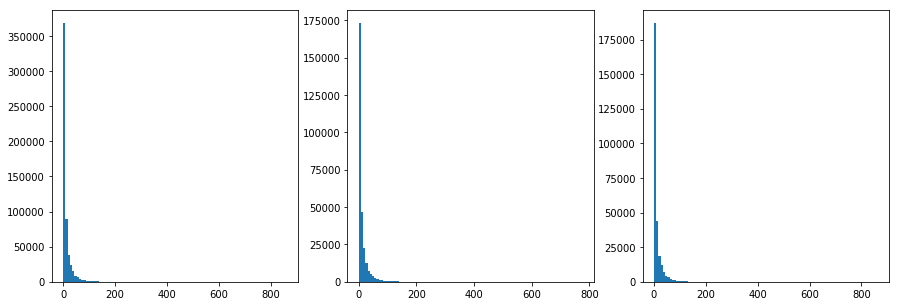

In [31]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.hist(ab_test_data.n_clicks,bins=100)
plt.subplot(132)
plt.hist(n_clicks_exp,bins=100)
plt.subplot(133)
plt.hist(n_clicks_control,bins=100)

In [35]:
np.random.seed(0)
n_boot_samples=500
n_clicks_control_mean_samples=map(np.mean,get_bootstrap_samples(np.array(n_clicks_control),n_boot_samples))
control_boot_chi_squared=map(np.var,get_bootstrap_samples(np.array(n_clicks_control),n_boot_samples))

In [38]:
import scipy.stats

((array([ 409.75447609,  417.6076492 ,  422.06789456,  425.24996033,
          427.75458277,  429.83540071,  431.6244473 ,  433.19958802,
          434.61075771,  435.89197548,  437.06750372,  438.15527962,
          439.16895419,  440.11916758,  441.0143809 ,  441.86143812,
          442.66595697,  443.43260794,  444.16531782,  444.86742108,
          445.54177438,  446.19084464,  446.81677748,  447.42145127,
          448.00652022,  448.57344901,  449.12354099,  449.6579613 ,
          450.17775596,  450.68386771,  451.17714938,  451.65837504,
          452.12824958,  452.58741674,  453.03646615,  453.47593922,
          453.90633437,  454.32811152,  454.74169597,  455.14748186,
          455.54583518,  455.93709642,  456.3215829 ,  456.69959087,
          457.07139736,  457.43726183,  457.79742761,  458.1521233 ,
          458.50156388,  458.84595184,  459.1854781 ,  459.52032292,
          459.85065667,  460.17664058,  460.49842735,  460.81616179,
          461.12998133,  461.44001

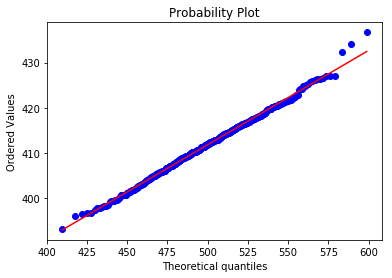

In [39]:
scipy.stats.probplot(control_boot_chi_squared,dist='chi2',sparams=(500-1),plot=plt)

((array([ -2.99209858e+00,  -2.71015927e+00,  -2.55162541e+00,
          -2.43921385e+00,  -2.35113311e+00,  -2.27822091e+00,
          -2.21572267e+00,  -2.16084152e+00,  -2.11178767e+00,
          -2.06734403e+00,  -2.02664403e+00,  -1.98904794e+00,
          -1.95406954e+00,  -1.92133033e+00,  -1.89052965e+00,
          -1.86142459e+00,  -1.83381593e+00,  -1.80753820e+00,
          -1.78245240e+00,  -1.75844061e+00,  -1.73540186e+00,
          -1.71324904e+00,  -1.69190643e+00,  -1.67130780e+00,
          -1.65139483e+00,  -1.63211595e+00,  -1.61342528e+00,
          -1.59528183e+00,  -1.57764883e+00,  -1.56049314e+00,
          -1.54378481e+00,  -1.52749667e+00,  -1.51160399e+00,
          -1.49608418e+00,  -1.48091659e+00,  -1.46608224e+00,
          -1.45156367e+00,  -1.43734479e+00,  -1.42341071e+00,
          -1.40974764e+00,  -1.39634279e+00,  -1.38318426e+00,
          -1.37026095e+00,  -1.35756253e+00,  -1.34507932e+00,
          -1.33280226e+00,  -1.32072287e+00,  -1.308833

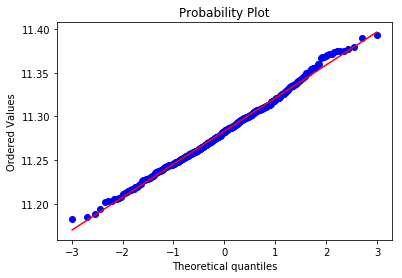

In [40]:
scipy.stats.probplot(n_clicks_control_mean_samples,plot=plt)

In [42]:
scipy.stats.mannwhitneyu(n_clicks_exp,n_clicks_control)

MannwhitneyuResult(statistic=38940590204.0, pvalue=3.1236179006848145e-75)

In [45]:
browsers=ab_test_data.browser.unique()

In [53]:
p_vals=[]
for b in browsers:
    a=n_clicks_exp.loc[ab_test_data.loc[ab_test_data.slot=='exp'].browser==b]
    b=n_clicks_control.loc[ab_test_data.loc[ab_test_data.slot=='control'].browser==b]
    pval=scipy.stats.mannwhitneyu(a,b,alternative='two-sided').pvalue
    p_vals.append(pval)
print p_vals

[0.054487720839448202, 0.81521235316909968, 0.0, 0.074801202860216034, 0.90733312777470754, 0.51481103044200638]


In [52]:
import statsmodels.stats.multitest as smm

In [62]:
rej,pval_corr,_,_=smm.multipletests(p_vals,alpha=0.05/6,method='holm')
print pval_corr

[ 0.2724386   1.          0.          0.29920481  1.          1.        ]


In [63]:
control=ab_test_data.loc[ab_test_data.slot=='control']
exp=ab_test_data.loc[ab_test_data.slot=='exp']

In [67]:
contr_l=[]
exp_l=[]
for b in browsers:
    contr_v=1.0*np.sum(control.loc[control.browser==b].n_nonclk_queries)/np.sum(control.loc[control.browser==b].n_queries)*100
    exp_v=1.0*np.sum(exp.loc[exp.browser==b].n_nonclk_queries)/np.sum(exp.loc[exp.browser==b].n_queries)*100
    contr_l.append(contr_v)
    exp_l.append(exp_v)
print contr_l
print exp_l

[45.96274717919465, 46.97092963514274, 57.59041136008114, 36.29936674628208, 40.540484743383296, 40.593976593513354]
[44.982746948554706, 45.14294190358467, 43.755617361273295, 36.93741284866483, 38.97737648371716, 39.85394721969546]
